# NumPy´s `.gradient()` Function vs. Analytical Derivatives

- `np.gradient()` is a numerical method for approximating the derivative on a discrete set of points. 
- It uses [finite differences](https://en.wikipedia.org/wiki/Finite_difference_method) to calculate the gradient at each point.
- If we apply `np.gradient()` to a discrete sequence of function values *f(x)*, it calculates a numerical approximation of the derivative by (central) finite differences (more precise than forward difference (one-sided difference) or backward difference (one-sided difference)):
$$ f'(x) \approx \frac{f_{i+1} - f_{i-1}}{x_{i+1} - x_{i-1}} $$
- NumPy uses a one-sided difference for boundary points, because there is no neighbor on one side:
$$ f'(x_0) \approx \frac{f_1 - f_0}{x_1 - x_0} = \frac{f(x_1) - f(x_0)}{h} \quad \text{with} \space h \space \text{as the step size} = x_1 - x_0 $$
$$ f'(x_n) \approx \frac{f_n - f_{n-1}}{x_n - x_{n-1}} = \frac{f(x_n) - f(x_{n-1})}{h} \quad \text{with} \space h \space \text{as the step size} = x_1 - x_0 $$
- The sign of *f'(x)* indicates whether the function is increasing or decreasing
    - *f'(x)* > 0: function is increasing
    - *f'(x)* < 0: function is decreasing
    - *f'(x)* = 0: function is constant, possibly at a local/global maximum or minimum or an inflection point
- The amount of *f'(x)* indicate how steep the function is at that point

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def f_x(x):
    """Function to differentiate
    
    **x**: array of x values
    """
    return 3 * np.pow(x, 2) 


def f_x_deriv(x):
    """Analytical derivative
    
    **x**: array of x values
    """
    return 6 * x


def f_x_deriv_hand(x, h):
    """Uses one-sided difference
    
    **x**: array of x values \\
    **h**: stepsize
    """
    return (f_x(x + h) - f_x(x)) / h


x_vals_10 = np.linspace(0, 10, 11)  # stepsize 1
x_vals_100 = np.linspace(0, 10, 101) # stepsize 0.1
x_vals_1000 = np.linspace(0, 10, 1001) # stepsize 0.01


# Only uses one-sided difference
y_vals_deriv_hand_10 = f_x_deriv_hand(x_vals_10, 1) # Using the hand-made derivative function
y_vals_deriv_hand_100 = f_x_deriv_hand(x_vals_100, 0.1) # Using the hand-made derivative function
y_vals_deriv_hand_1000 = f_x_deriv_hand(x_vals_1000, 0.01) # Using the hand-made derivative function


# Uses for first and last point a one-sided difference, for the rest a central finite difference
# More exact than the hand-made derivative
y_vals_deriv_npGradient_10 = np.gradient(f_x(x_vals_10), 1) # Using the numpy gradient function
y_vals_deriv_npGradient_100 = np.gradient(f_x(x_vals_100), 0.1) # Using the numpy gradient function
y_vals_deriv_npGradient_1000 = np.gradient(f_x(x_vals_1000), 0.01) # Using the numpy gradient function


y_vals_deriv_10 = f_x_deriv(x_vals_10) # analytical derivative
y_vals_deriv_100 = f_x_deriv(x_vals_100) # analytical derivative
y_vals_deriv_1000 = f_x_deriv(x_vals_1000) # analytical derivative

In [20]:
y_vals_deriv_hand_10, y_vals_deriv_npGradient_10, y_vals_deriv_10

(array([ 3.,  9., 15., 21., 27., 33., 39., 45., 51., 57., 63.]),
 array([ 3.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 57.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]))

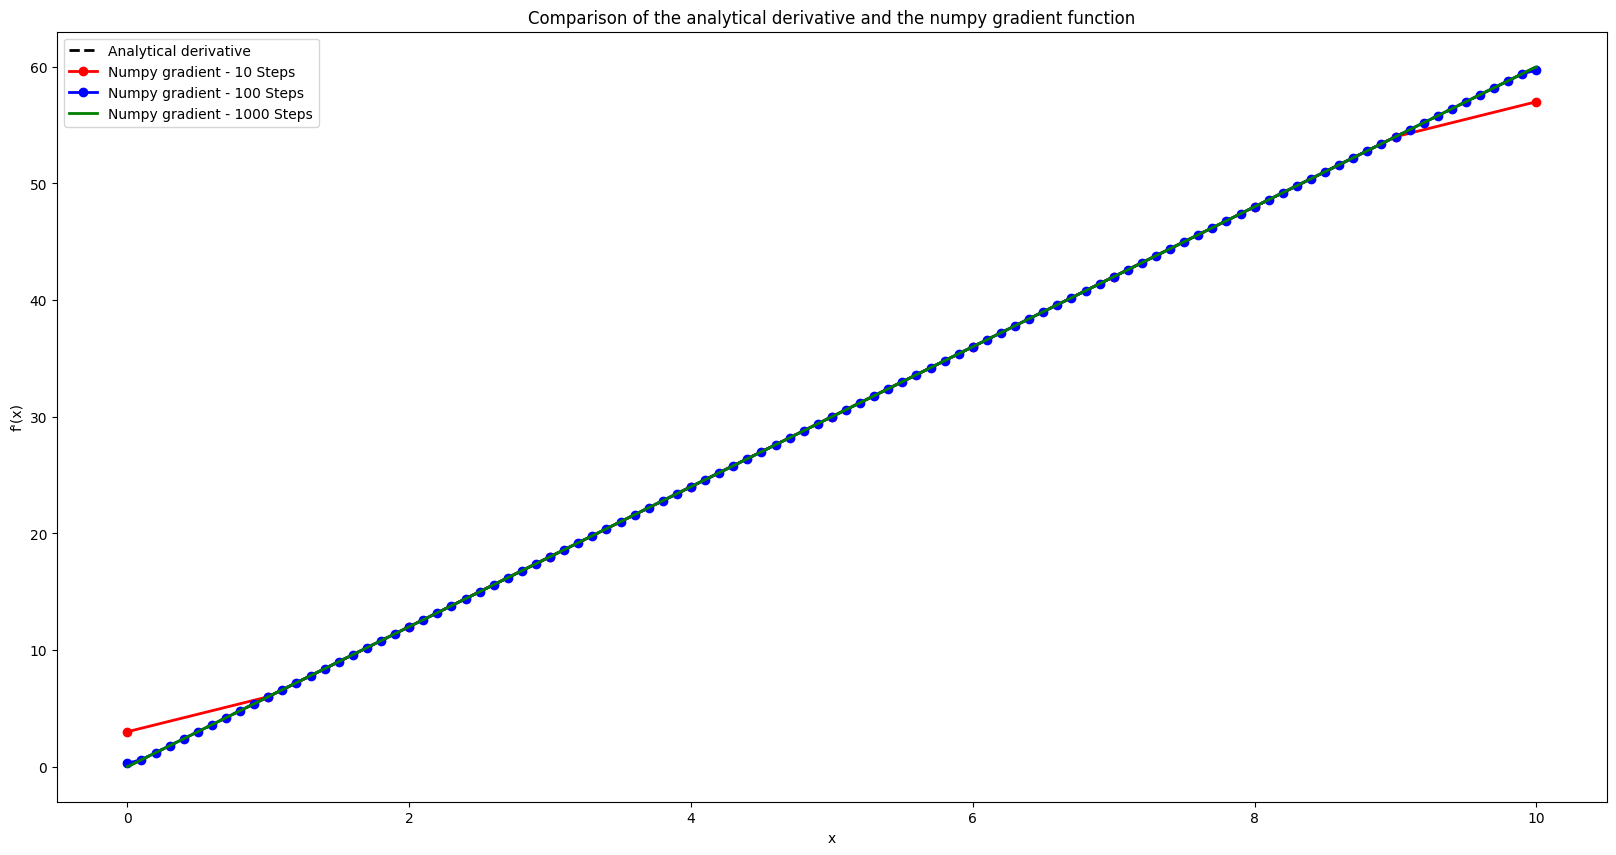

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(x_vals_1000, y_vals_deriv_1000,'k--', label="Analytical derivative", linewidth=2)
plt.plot(x_vals_10, y_vals_deriv_npGradient_10, 'ro-', label="Numpy gradient - 10 Steps", linewidth=2)
plt.plot(x_vals_100, y_vals_deriv_npGradient_100, 'bo-', label="Numpy gradient - 100 Steps", linewidth=2)
plt.plot(x_vals_1000, y_vals_deriv_npGradient_1000, 'g-', label="Numpy gradient - 1000 Steps", linewidth=2)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Comparison of the analytical derivative and the numpy gradient function")
plt.legend()
plt.show()